 # <h1 style='background:#6daa9f; border:0; color:black'><center>HEART FAILURE</center></h1> 
 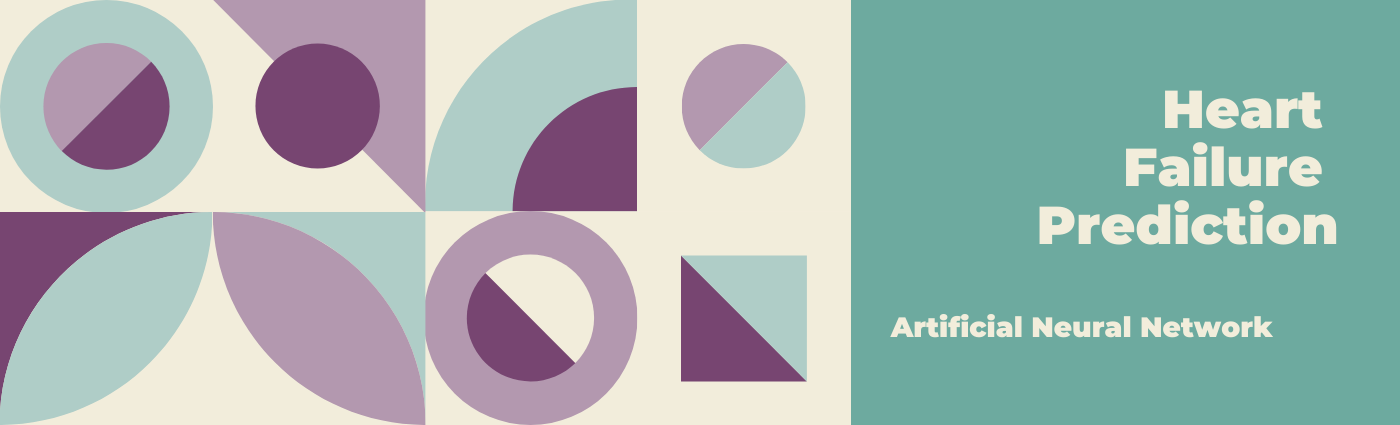

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart. 



# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

2023-02-22 11:49:01.212380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix od the various attributes to examine the feature importance.



<Axes: xlabel='DEATH_EVENT', ylabel='count'>

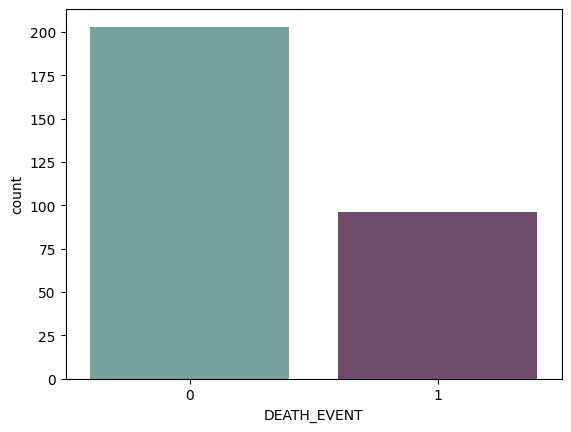

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

Point to note is that there is an imbalance in the data.

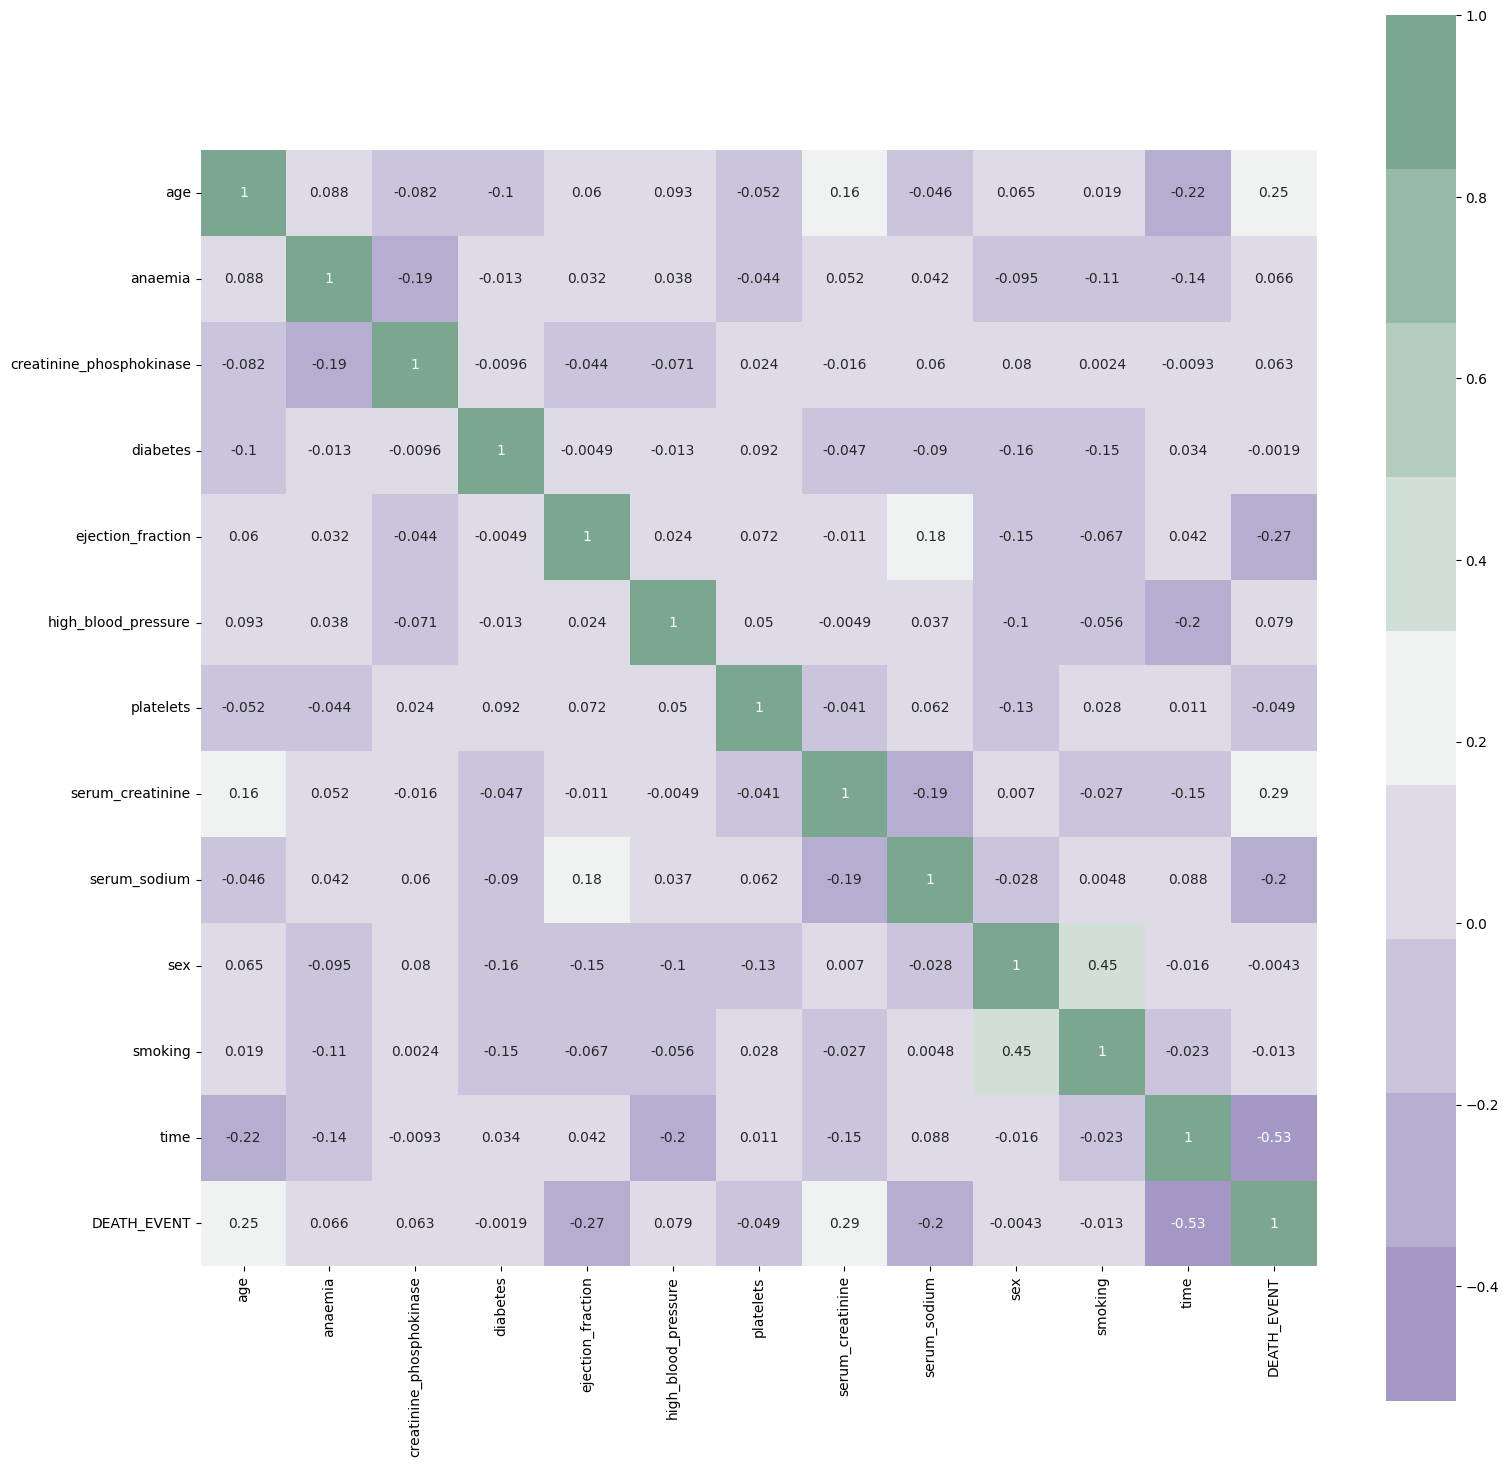

In [5]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**Notable points:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. 
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing 

**Next, we will examine the count plot of age.**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [7]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [8]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [9]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

In this project, we build an artificial neural network.

**Following steps are involved in the model building**
* Initialising the ANN
* Defining by adding layers
* Compiling the ANN
* Train the ANN

monitor: Quantity to be monitored.

min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

patience: Number of epochs with no improvement after which training will be stopped.

verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.

mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.

restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

start_from_epoch: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped.



In [10]:
import psutil


# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.2,)


2023-02-22 11:49:03.751534: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/shreyanthhg/opt/anaconda3/envs/Tensorflow/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 0.6928 - accuracy: 0.6089 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.6480 - val_loss: 0.6912 - val_accuracy: 0.6667
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.6480 - val_loss: 0.6903 - val_accuracy: 0.6667
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.6480 - val_loss: 0.6894 - val_accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.6480 - val_loss: 0.6885 - val_accuracy: 0.6667
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.6480 - val_loss: 0.6876 - val_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.6480 - val_loss: 0.6868 - val_accuracy: 0.6667
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.8380 - val_loss: 0.5888 - val_accuracy: 0.7556
Epoch 60/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5783 - accuracy: 0.8045 - val_loss: 0.5871 - val_accuracy: 0.7556
Epoch 61/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5486 - accuracy: 0.8380 - val_loss: 0.5845 - val_accuracy: 0.7556
Epoch 62/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.8380 - val_loss: 0.5826 - val_accuracy: 0.7556
Epoch 63/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5425 - accuracy: 0.8212 - val_loss: 0.5813 - val_accuracy: 0.7556
Epoch 64/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.8380 - val_loss: 0.5810 - val_accuracy: 0.7556
Epoch 65/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.8045 - val_loss: 0.5804 - val_accuracy: 0.7556
Epoch 66/100
6/6 [===============

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable pa

In [12]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 75.31%


**Plotting training and validation loss over epochs**

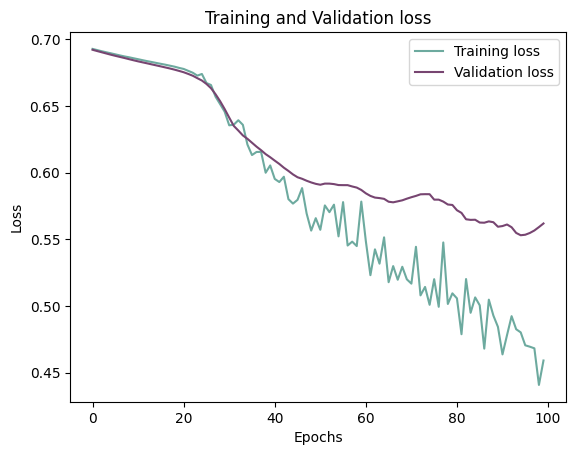

In [13]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

**Plotting training and validation accuracy over epochs**

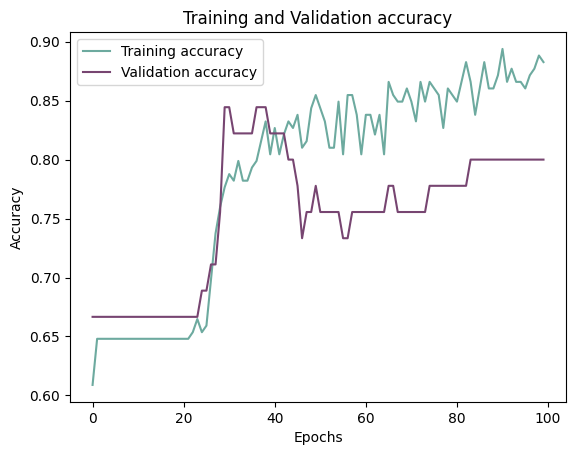

In [14]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **<span style="color:#6daa9f;">CONCLUSIONS</span>**

**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [15]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 850us/step


<Axes: >

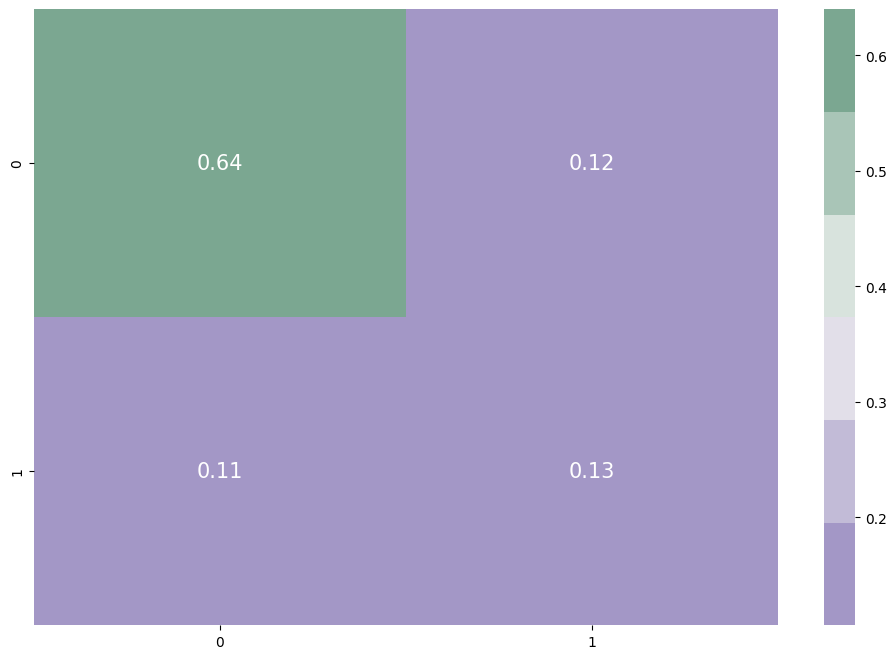

In [16]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        57
           1       0.53      0.56      0.54        18

    accuracy                           0.77        75
   macro avg       0.69      0.70      0.70        75
weighted avg       0.78      0.77      0.78        75



# Model performance with Tensorflow in MacOs

In [18]:

# Measure time taken for training
start_time = time.time()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size =64, epochs = 1000)
end_time = time.time()
print("Time Taken: {:.2f} seconds".format(end_time - start_time))

# Measure CPU usage
cpu_percent = psutil.cpu_percent(interval=None)
print("CPU Usage: {}%".format(cpu_percent))

# Measure memory usage
process = psutil.Process()
memory_info = process.memory_info()
print("Memory Usage: {:.2f} MB".format(memory_info.rss / 1024 / 1024))


Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.8616
Epoch 2/1000
4/4 [==============================] - 0s 951us/step - loss: 0.4840 - accuracy: 0.8661
Epoch 3/1000
4/4 [==============================] - 0s 933us/step - loss: 0.4836 - accuracy: 0.8705
Epoch 4/1000
4/4 [==============================] - 0s 957us/step - loss: 0.4921 - accuracy: 0.8482
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8661
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.8571
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.8482
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.8661
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8705
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.8839
Epoch 11/1000

4/4 [==============================] - 0s 778us/step - loss: 0.4196 - accuracy: 0.8705
Epoch 83/1000
4/4 [==============================] - 0s 789us/step - loss: 0.4042 - accuracy: 0.8750
Epoch 84/1000
4/4 [==============================] - 0s 765us/step - loss: 0.4253 - accuracy: 0.8616
Epoch 85/1000
4/4 [==============================] - 0s 799us/step - loss: 0.3990 - accuracy: 0.8795
Epoch 86/1000
4/4 [==============================] - 0s 826us/step - loss: 0.4059 - accuracy: 0.8795
Epoch 87/1000
4/4 [==============================] - 0s 827us/step - loss: 0.4212 - accuracy: 0.8750
Epoch 88/1000
4/4 [==============================] - 0s 809us/step - loss: 0.4234 - accuracy: 0.8616
Epoch 89/1000
4/4 [==============================] - 0s 799us/step - loss: 0.4105 - accuracy: 0.8795
Epoch 90/1000
4/4 [==============================] - 0s 806us/step - loss: 0.4300 - accuracy: 0.8884
Epoch 91/1000
4/4 [==============================] - 0s 777us/step - loss: 0.4411 - accuracy: 0.8571
Epoc

4/4 [==============================] - 0s 804us/step - loss: 0.3415 - accuracy: 0.8973
Epoch 163/1000
4/4 [==============================] - 0s 737us/step - loss: 0.3461 - accuracy: 0.8929
Epoch 164/1000
4/4 [==============================] - 0s 855us/step - loss: 0.3566 - accuracy: 0.8884
Epoch 165/1000
4/4 [==============================] - 0s 804us/step - loss: 0.3480 - accuracy: 0.9018
Epoch 166/1000
4/4 [==============================] - 0s 796us/step - loss: 0.3644 - accuracy: 0.8929
Epoch 167/1000
4/4 [==============================] - 0s 811us/step - loss: 0.3559 - accuracy: 0.8929
Epoch 168/1000
4/4 [==============================] - 0s 786us/step - loss: 0.3435 - accuracy: 0.8929
Epoch 169/1000
4/4 [==============================] - 0s 766us/step - loss: 0.3540 - accuracy: 0.8839
Epoch 170/1000
4/4 [==============================] - 0s 792us/step - loss: 0.3435 - accuracy: 0.8929
Epoch 171/1000
4/4 [==============================] - 0s 799us/step - loss: 0.3458 - accuracy: 0.

4/4 [==============================] - 0s 813us/step - loss: 0.3022 - accuracy: 0.9107
Epoch 243/1000
4/4 [==============================] - 0s 812us/step - loss: 0.3302 - accuracy: 0.8973
Epoch 244/1000
4/4 [==============================] - 0s 736us/step - loss: 0.3177 - accuracy: 0.9018
Epoch 245/1000
4/4 [==============================] - 0s 768us/step - loss: 0.3016 - accuracy: 0.9152
Epoch 246/1000
4/4 [==============================] - 0s 785us/step - loss: 0.3382 - accuracy: 0.8929
Epoch 247/1000
4/4 [==============================] - 0s 816us/step - loss: 0.3245 - accuracy: 0.8973
Epoch 248/1000
4/4 [==============================] - 0s 790us/step - loss: 0.2826 - accuracy: 0.9241
Epoch 249/1000
4/4 [==============================] - 0s 815us/step - loss: 0.3363 - accuracy: 0.8973
Epoch 250/1000
4/4 [==============================] - 0s 748us/step - loss: 0.3061 - accuracy: 0.9107
Epoch 251/1000
4/4 [==============================] - 0s 784us/step - loss: 0.3034 - accuracy: 0.

4/4 [==============================] - 0s 764us/step - loss: 0.2940 - accuracy: 0.9107
Epoch 323/1000
4/4 [==============================] - 0s 795us/step - loss: 0.2806 - accuracy: 0.9152
Epoch 324/1000
4/4 [==============================] - 0s 750us/step - loss: 0.2852 - accuracy: 0.9152
Epoch 325/1000
4/4 [==============================] - 0s 826us/step - loss: 0.2822 - accuracy: 0.9196
Epoch 326/1000
4/4 [==============================] - 0s 760us/step - loss: 0.2804 - accuracy: 0.9152
Epoch 327/1000
4/4 [==============================] - 0s 779us/step - loss: 0.2891 - accuracy: 0.9152
Epoch 328/1000
4/4 [==============================] - 0s 770us/step - loss: 0.2763 - accuracy: 0.9196
Epoch 329/1000
4/4 [==============================] - 0s 747us/step - loss: 0.2878 - accuracy: 0.9152
Epoch 330/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.9241
Epoch 331/1000
4/4 [==============================] - 0s 842us/step - loss: 0.2849 - accuracy: 0.91

4/4 [==============================] - 0s 813us/step - loss: 0.2726 - accuracy: 0.9152
Epoch 403/1000
4/4 [==============================] - 0s 788us/step - loss: 0.2858 - accuracy: 0.9107
Epoch 404/1000
4/4 [==============================] - 0s 756us/step - loss: 0.2758 - accuracy: 0.9152
Epoch 405/1000
4/4 [==============================] - 0s 790us/step - loss: 0.2863 - accuracy: 0.9107
Epoch 406/1000
4/4 [==============================] - 0s 730us/step - loss: 0.2776 - accuracy: 0.9152
Epoch 407/1000
4/4 [==============================] - 0s 769us/step - loss: 0.2670 - accuracy: 0.9196
Epoch 408/1000
4/4 [==============================] - 0s 757us/step - loss: 0.2854 - accuracy: 0.9062
Epoch 409/1000
4/4 [==============================] - 0s 780us/step - loss: 0.2760 - accuracy: 0.9152
Epoch 410/1000
4/4 [==============================] - 0s 735us/step - loss: 0.3008 - accuracy: 0.9018
Epoch 411/1000
4/4 [==============================] - 0s 826us/step - loss: 0.2976 - accuracy: 0.

4/4 [==============================] - 0s 797us/step - loss: 0.2706 - accuracy: 0.9152
Epoch 483/1000
4/4 [==============================] - 0s 730us/step - loss: 0.2671 - accuracy: 0.9196
Epoch 484/1000
4/4 [==============================] - 0s 790us/step - loss: 0.2511 - accuracy: 0.9241
Epoch 485/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2779 - accuracy: 0.9107
Epoch 486/1000
4/4 [==============================] - 0s 772us/step - loss: 0.2616 - accuracy: 0.9196
Epoch 487/1000
4/4 [==============================] - 0s 738us/step - loss: 0.2616 - accuracy: 0.9241
Epoch 488/1000
4/4 [==============================] - 0s 740us/step - loss: 0.2690 - accuracy: 0.9152
Epoch 489/1000
4/4 [==============================] - 0s 812us/step - loss: 0.2523 - accuracy: 0.9241
Epoch 490/1000
4/4 [==============================] - 0s 754us/step - loss: 0.2693 - accuracy: 0.9152
Epoch 491/1000
4/4 [==============================] - 0s 765us/step - loss: 0.2552 - accuracy: 0.

4/4 [==============================] - 0s 759us/step - loss: 0.2862 - accuracy: 0.9062
Epoch 563/1000
4/4 [==============================] - 0s 765us/step - loss: 0.3034 - accuracy: 0.8973
Epoch 564/1000
4/4 [==============================] - 0s 828us/step - loss: 0.2839 - accuracy: 0.9062
Epoch 565/1000
4/4 [==============================] - 0s 802us/step - loss: 0.3128 - accuracy: 0.8929
Epoch 566/1000
4/4 [==============================] - 0s 787us/step - loss: 0.3029 - accuracy: 0.8973
Epoch 567/1000
4/4 [==============================] - 0s 834us/step - loss: 0.2935 - accuracy: 0.9018
Epoch 568/1000
4/4 [==============================] - 0s 822us/step - loss: 0.2634 - accuracy: 0.9152
Epoch 569/1000
4/4 [==============================] - 0s 826us/step - loss: 0.2677 - accuracy: 0.9152
Epoch 570/1000
4/4 [==============================] - 0s 804us/step - loss: 0.2517 - accuracy: 0.9241
Epoch 571/1000
4/4 [==============================] - 0s 796us/step - loss: 0.2490 - accuracy: 0.

4/4 [==============================] - 0s 933us/step - loss: 0.2766 - accuracy: 0.9107
Epoch 643/1000
4/4 [==============================] - 0s 819us/step - loss: 0.2314 - accuracy: 0.9330
Epoch 644/1000
4/4 [==============================] - 0s 795us/step - loss: 0.2298 - accuracy: 0.9330
Epoch 645/1000
4/4 [==============================] - 0s 823us/step - loss: 0.2573 - accuracy: 0.9196
Epoch 646/1000
4/4 [==============================] - 0s 985us/step - loss: 0.2750 - accuracy: 0.9107
Epoch 647/1000
4/4 [==============================] - 0s 806us/step - loss: 0.2524 - accuracy: 0.9241
Epoch 648/1000
4/4 [==============================] - 0s 780us/step - loss: 0.2585 - accuracy: 0.9152
Epoch 649/1000
4/4 [==============================] - 0s 754us/step - loss: 0.2575 - accuracy: 0.9196
Epoch 650/1000
4/4 [==============================] - 0s 857us/step - loss: 0.2894 - accuracy: 0.9018
Epoch 651/1000
4/4 [==============================] - 0s 781us/step - loss: 0.2801 - accuracy: 0.

4/4 [==============================] - 0s 833us/step - loss: 0.2739 - accuracy: 0.9107
Epoch 723/1000
4/4 [==============================] - 0s 787us/step - loss: 0.2648 - accuracy: 0.9152
Epoch 724/1000
4/4 [==============================] - 0s 789us/step - loss: 0.2827 - accuracy: 0.9062
Epoch 725/1000
4/4 [==============================] - 0s 774us/step - loss: 0.2635 - accuracy: 0.9152
Epoch 726/1000
4/4 [==============================] - 0s 799us/step - loss: 0.3111 - accuracy: 0.8929
Epoch 727/1000
4/4 [==============================] - 0s 863us/step - loss: 0.2556 - accuracy: 0.9196
Epoch 728/1000
4/4 [==============================] - 0s 785us/step - loss: 0.2658 - accuracy: 0.9152
Epoch 729/1000
4/4 [==============================] - 0s 836us/step - loss: 0.2562 - accuracy: 0.9196
Epoch 730/1000
4/4 [==============================] - 0s 815us/step - loss: 0.2646 - accuracy: 0.9152
Epoch 731/1000
4/4 [==============================] - 0s 759us/step - loss: 0.2753 - accuracy: 0.

4/4 [==============================] - 0s 788us/step - loss: 0.2646 - accuracy: 0.9152
Epoch 803/1000
4/4 [==============================] - 0s 772us/step - loss: 0.2644 - accuracy: 0.9152
Epoch 804/1000
4/4 [==============================] - 0s 789us/step - loss: 0.2917 - accuracy: 0.9018
Epoch 805/1000
4/4 [==============================] - 0s 785us/step - loss: 0.2540 - accuracy: 0.9196
Epoch 806/1000
4/4 [==============================] - 0s 748us/step - loss: 0.2464 - accuracy: 0.9241
Epoch 807/1000
4/4 [==============================] - 0s 784us/step - loss: 0.2541 - accuracy: 0.9196
Epoch 808/1000
4/4 [==============================] - 0s 767us/step - loss: 0.2453 - accuracy: 0.9241
Epoch 809/1000
4/4 [==============================] - 0s 746us/step - loss: 0.2834 - accuracy: 0.9062
Epoch 810/1000
4/4 [==============================] - 0s 782us/step - loss: 0.2550 - accuracy: 0.9196
Epoch 811/1000
4/4 [==============================] - 0s 733us/step - loss: 0.2639 - accuracy: 0.

4/4 [==============================] - 0s 852us/step - loss: 0.2512 - accuracy: 0.9196
Epoch 883/1000
4/4 [==============================] - 0s 752us/step - loss: 0.2448 - accuracy: 0.9241
Epoch 884/1000
4/4 [==============================] - 0s 810us/step - loss: 0.2473 - accuracy: 0.9241
Epoch 885/1000
4/4 [==============================] - 0s 759us/step - loss: 0.2549 - accuracy: 0.9196
Epoch 886/1000
4/4 [==============================] - 0s 765us/step - loss: 0.2920 - accuracy: 0.9018
Epoch 887/1000
4/4 [==============================] - 0s 759us/step - loss: 0.2544 - accuracy: 0.9196
Epoch 888/1000
4/4 [==============================] - 0s 745us/step - loss: 0.2645 - accuracy: 0.9152
Epoch 889/1000
4/4 [==============================] - 0s 750us/step - loss: 0.2548 - accuracy: 0.9196
Epoch 890/1000
4/4 [==============================] - 0s 753us/step - loss: 0.2543 - accuracy: 0.9196
Epoch 891/1000
4/4 [==============================] - 0s 760us/step - loss: 0.2639 - accuracy: 0.

4/4 [==============================] - 0s 871us/step - loss: 0.2445 - accuracy: 0.9241
Epoch 963/1000
4/4 [==============================] - 0s 905us/step - loss: 0.2447 - accuracy: 0.9241
Epoch 964/1000
4/4 [==============================] - 0s 994us/step - loss: 0.2918 - accuracy: 0.9018
Epoch 965/1000
4/4 [==============================] - 0s 932us/step - loss: 0.2918 - accuracy: 0.9018
Epoch 966/1000
4/4 [==============================] - 0s 831us/step - loss: 0.2634 - accuracy: 0.9152
Epoch 967/1000
4/4 [==============================] - 0s 895us/step - loss: 0.2536 - accuracy: 0.9196
Epoch 968/1000
4/4 [==============================] - 0s 851us/step - loss: 0.2252 - accuracy: 0.9330
Epoch 969/1000
4/4 [==============================] - 0s 763us/step - loss: 0.2656 - accuracy: 0.9152
Epoch 970/1000
4/4 [==============================] - 0s 743us/step - loss: 0.2742 - accuracy: 0.9107
Epoch 971/1000
4/4 [==============================] - 0s 743us/step - loss: 0.2580 - accuracy: 0.